In [12]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sma
import seaborn as sns

In [24]:
plt.rcParams['figure.dpi'] = 1200 # use 1200 for more clarity

In [9]:
# load csv as dataframe and print
WQ_df = pd.read_csv('C:\\Users\\ANGELASEIBERT\\Desktop\\Hydro\\Water_Quality_Data.csv')
# WQ_df

In [4]:
# filter df by upper and lower dam
WQ_df_upper = WQ_df[WQ_df['Site_Location'] == 'Upper']
WQ_df_lower = WQ_df[WQ_df['Site_Location'] == 'Lower']

In [5]:
# filter by feature
WQ_df_upper_BC = WQ_df_upper[WQ_df_upper['Site_Information'] == 'Below Confluence']
WQ_df_upper_MC = WQ_df_upper[WQ_df_upper['Site_Information'] == 'Main Channel']
WQ_df_upper_P = WQ_df_upper[WQ_df_upper['Site_Information'] == 'Pool']
WQ_df_upper_SC = WQ_df_upper[WQ_df_upper['Site_Information'] == 'Side Channel']

WQ_df_lower_BC = WQ_df_lower[WQ_df_lower['Site_Information'] == 'Below Confluence']
WQ_df_lower_MC = WQ_df_lower[WQ_df_lower['Site_Information'] == 'Main Channel']
WQ_df_lower_P = WQ_df_lower[WQ_df_lower['Site_Information'] == 'Pool']
WQ_df_lower_SC = WQ_df_lower[WQ_df_lower['Site_Information'] == 'Side Channel']

In [27]:
# normalize 
cols_to_norm = ['EC', 'Temp_C', 'NOx_mgL', 'PO4_mgL', 'NH4'] 


WQ_df_upper[cols_to_norm] = MinMaxScaler().fit_transform(WQ_df_upper[cols_to_norm])
WQ_df_lower[cols_to_norm] = MinMaxScaler().fit_transform(WQ_df_lower[cols_to_norm])


C:\Users\ANGELASEIBERT\AppData\Local\Temp\ipykernel_8736\1223010642.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WQ_df_upper[cols_to_norm] = MinMaxScaler().fit_transform(WQ_df_upper[cols_to_norm])
C:\Users\ANGELASEIBERT\AppData\Local\Temp\ipykernel_8736\1223010642.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WQ_df_lower[cols_to_norm] = MinMaxScaler().fit_transform(WQ_df_lower[cols_to_norm])


In [30]:
# check normalzied dataframe 
WQ_df_lower
# WQ_df_upper

,SampleID,Date,Time,Site_Information,Site_Location,Temp_C,EC,NOx_mgL,PO4_mgL,NH4,Notes,Key,Dam Location,Unnamed: 13
1,LC,2/24/2023,10:16,Below Confluence,Lower,1.000000,0.000000,0.000000,0.125,0.272727,Possible temp outlier?,PO4 = phosphate,NaN,NaN
3,LM,2/24/2023,10:23,Main Channel,Lower,0.484848,0.635220,0.142857,0.000,0.181818,NaN,EC = Electrical Conductance,Upper,"43.700441, -116.156866"
7,LP1,2/24/2023,10:23,Pool,Lower,0.136364,0.635220,0.000000,0.125,0.181818,"Angela breaks ice with her feet, 80 cm from le...",NO2 = nitrite,NaN,NaN
8,LP2,2/24/2023,10:24,Pool,Lower,0.090909,0.635220,0.142857,0.250,0.090909,225 cm from left bank,NA = not applicable,NaN,NaN
9,LP3,2/24/2023,10:24,Pool,Lower,0.060606,0.635220,0.000000,0.250,0.363636,290 cm from left bank,NaN,NaN,NaN
11,LS,2/24/2023,10:20,Side Channel,Lower,0.439394,0.569182,0.000000,0.000,0.090909,NaN,NO3 = nitrate,Lower,"43.699607, -116.157978"
13,LC,3/3/2023,9:18,Below Confluence,Lower,0.075758,0.990566,0.428571,0.750,0.090909,"4ft above flagging, right above small pool at ...",NaN,NaN,NaN
15,LM,3/3/2023,9:43,Main Channel,Lower,0.000000,1.000000,0.714286,0.125,0.000000,NaN,NaN,NaN,NaN
19,LP1,3/3/2023,9:57,Pool,Lower,0.015152,0.946541,0.571429,0.250,0.909091,1 m from left bank (facing downstream) signfic...,NaN,NaN,NaN
20,LP2,3/3/2023,10:00,Pool,Lower,0.015152,0.943396,0.714286,0.000,0.090909,2m from left bank (facing downstream) signfic...,NaN,NaN,NaN


In [67]:
# X = WQ_df_upper.EC
X = WQ_df_upper.PO4_mgL

# y = WQ_df_upper.NOx_mgL
# y = WQ_df_upper.PO4_mgL
y = WQ_df_upper.NH4

x2 = sma.add_constant(X)

_1 = sma.OLS(y, x2)
_2 = _1.fit()

print(_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    NH4   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.406
Date:                Thu, 13 Apr 2023   Prob (F-statistic):              0.253
Time:                        22:51:23   Log-Likelihood:                 3.9878
No. Observations:                  18   AIC:                            -3.976
Df Residuals:                      16   BIC:                            -2.195
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2792      0.104      2.675      0.0

C:\Users\ANGELASEIBERT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(-0.035, 0.9, 'p < 0.01')

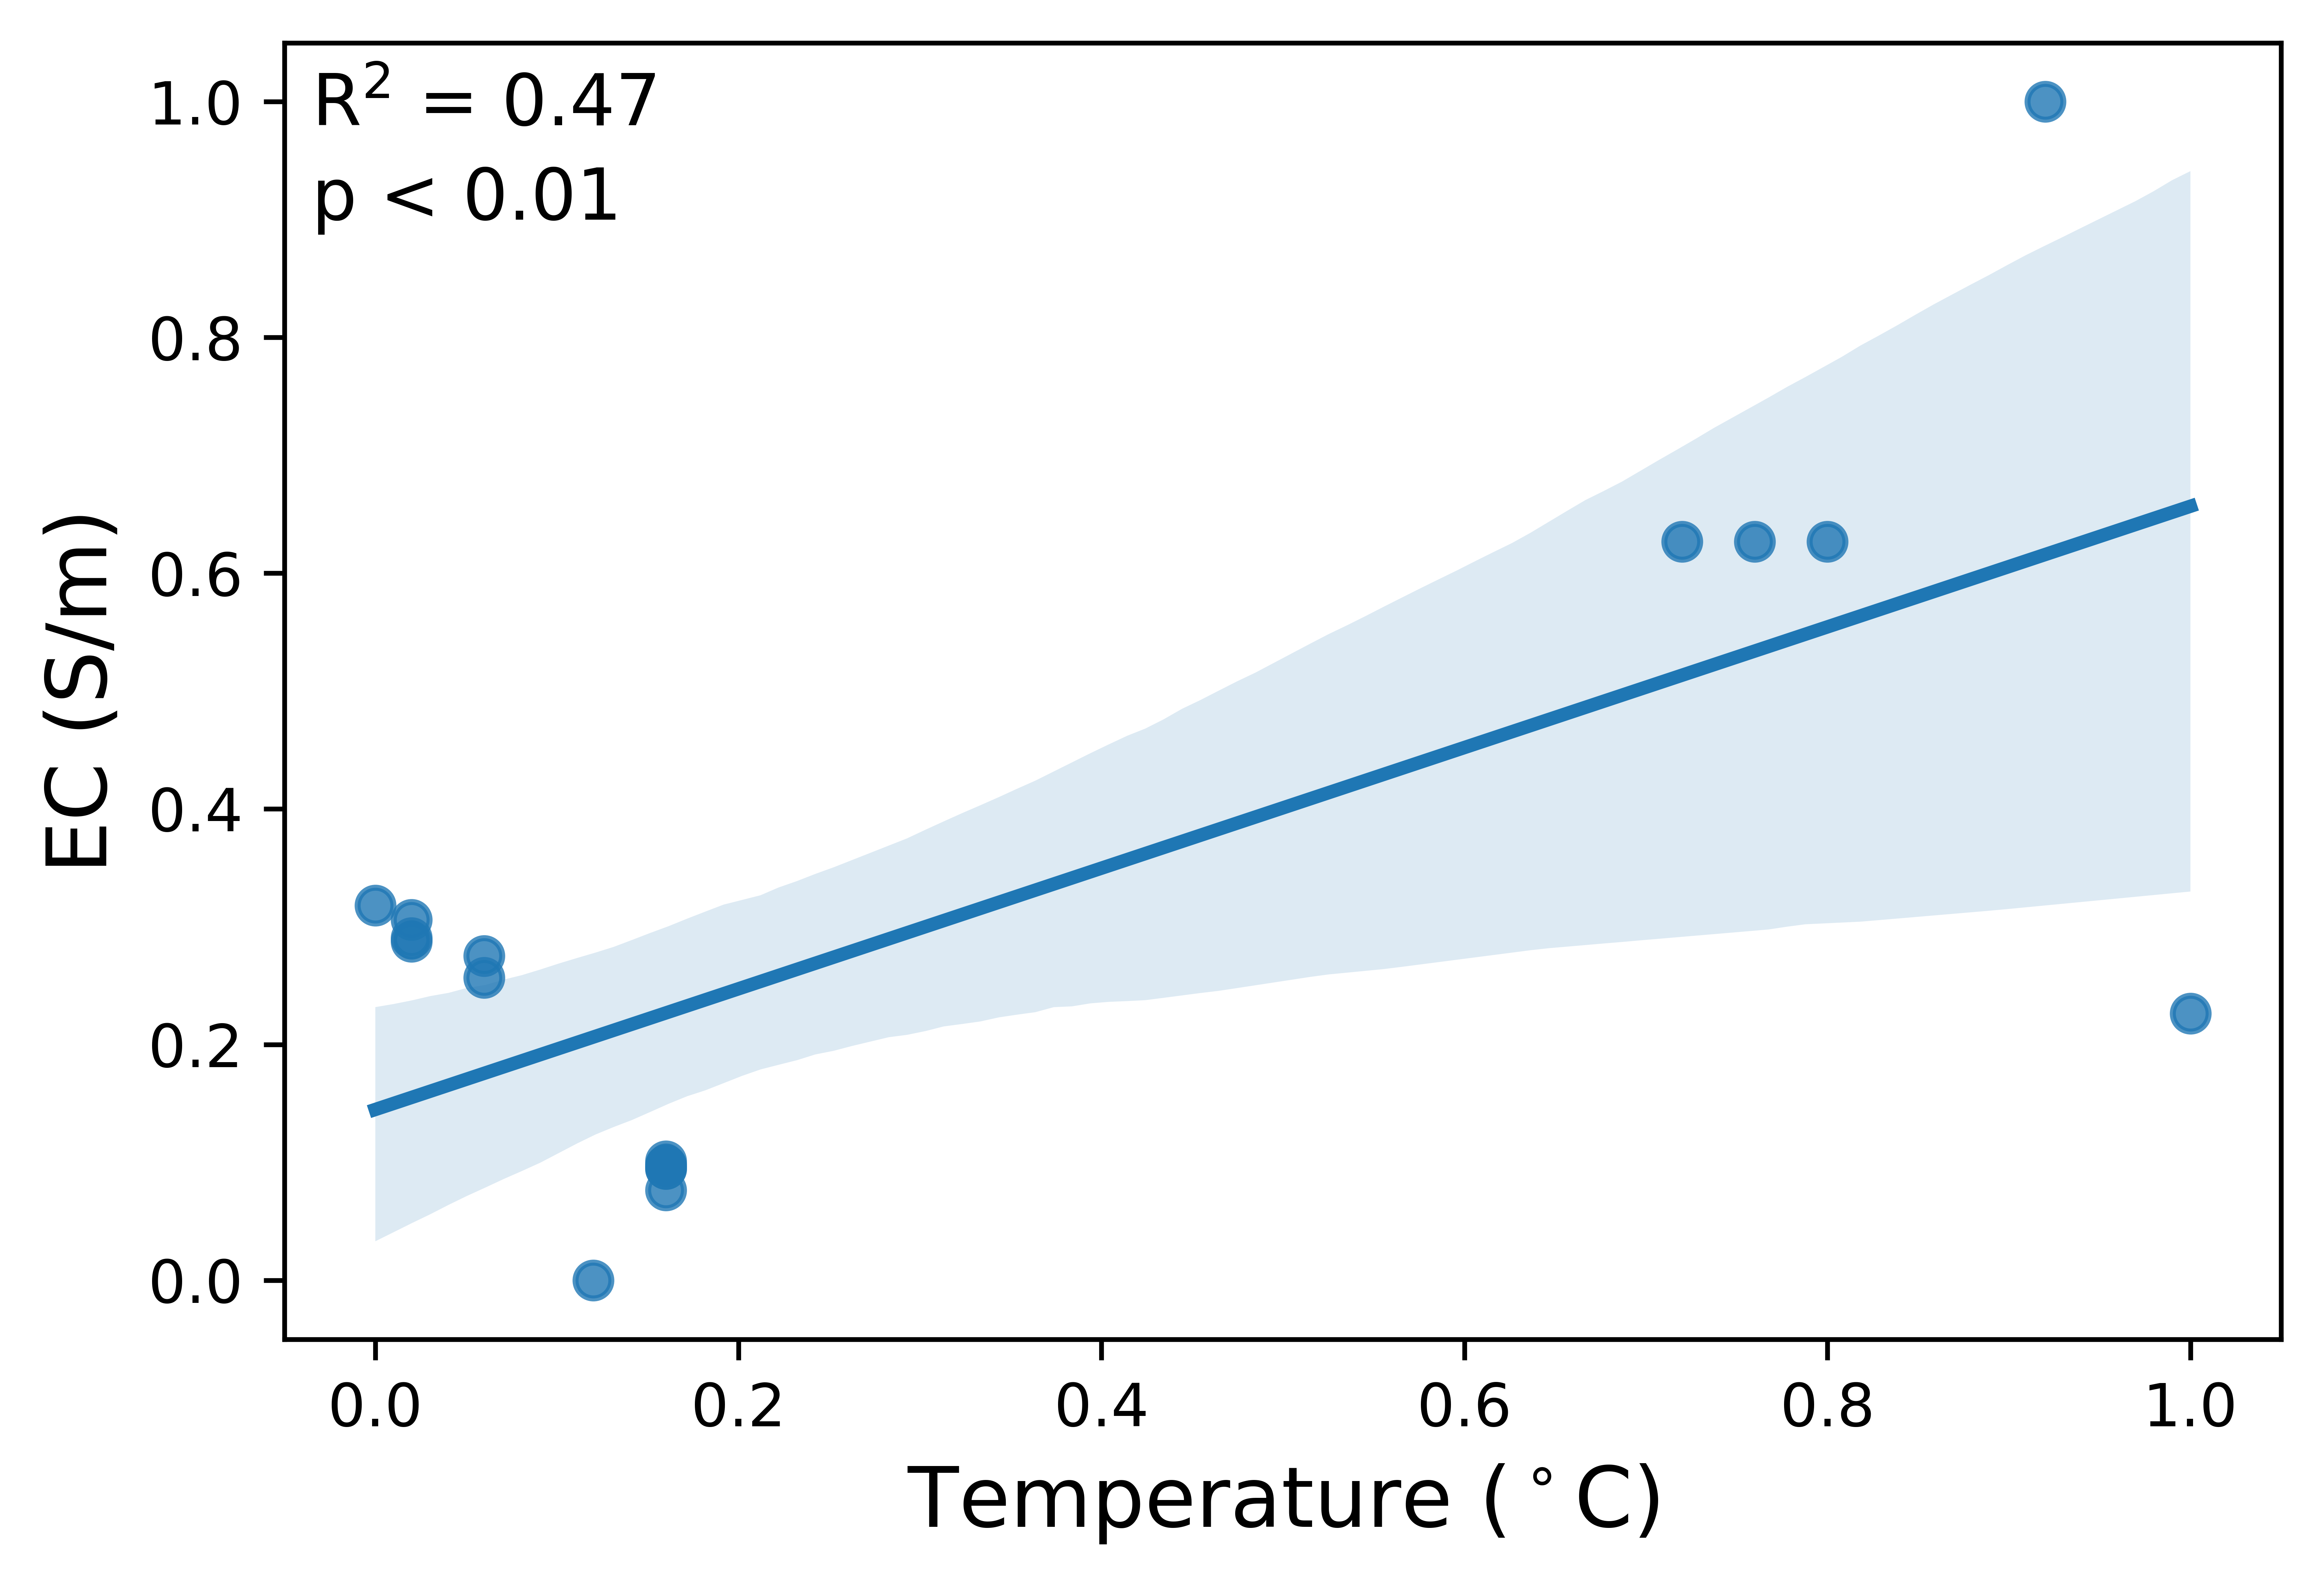

In [48]:
sns.regplot(data=WQ_df_upper, x="Temp_C", y= 'EC')

plt.ylabel("EC (S/m)", fontsize = 14)
plt.xlabel("Temperature ($^\circ$C)", fontsize = 14)
plt.text(-0.035, 0.98, 'R${}^2$ = 0.47', fontsize = 12)
plt.text(-0.035, 0.9, 'p < 0.01', fontsize = 12)

Text(-0.035, 0.9, 'p < 0.01')

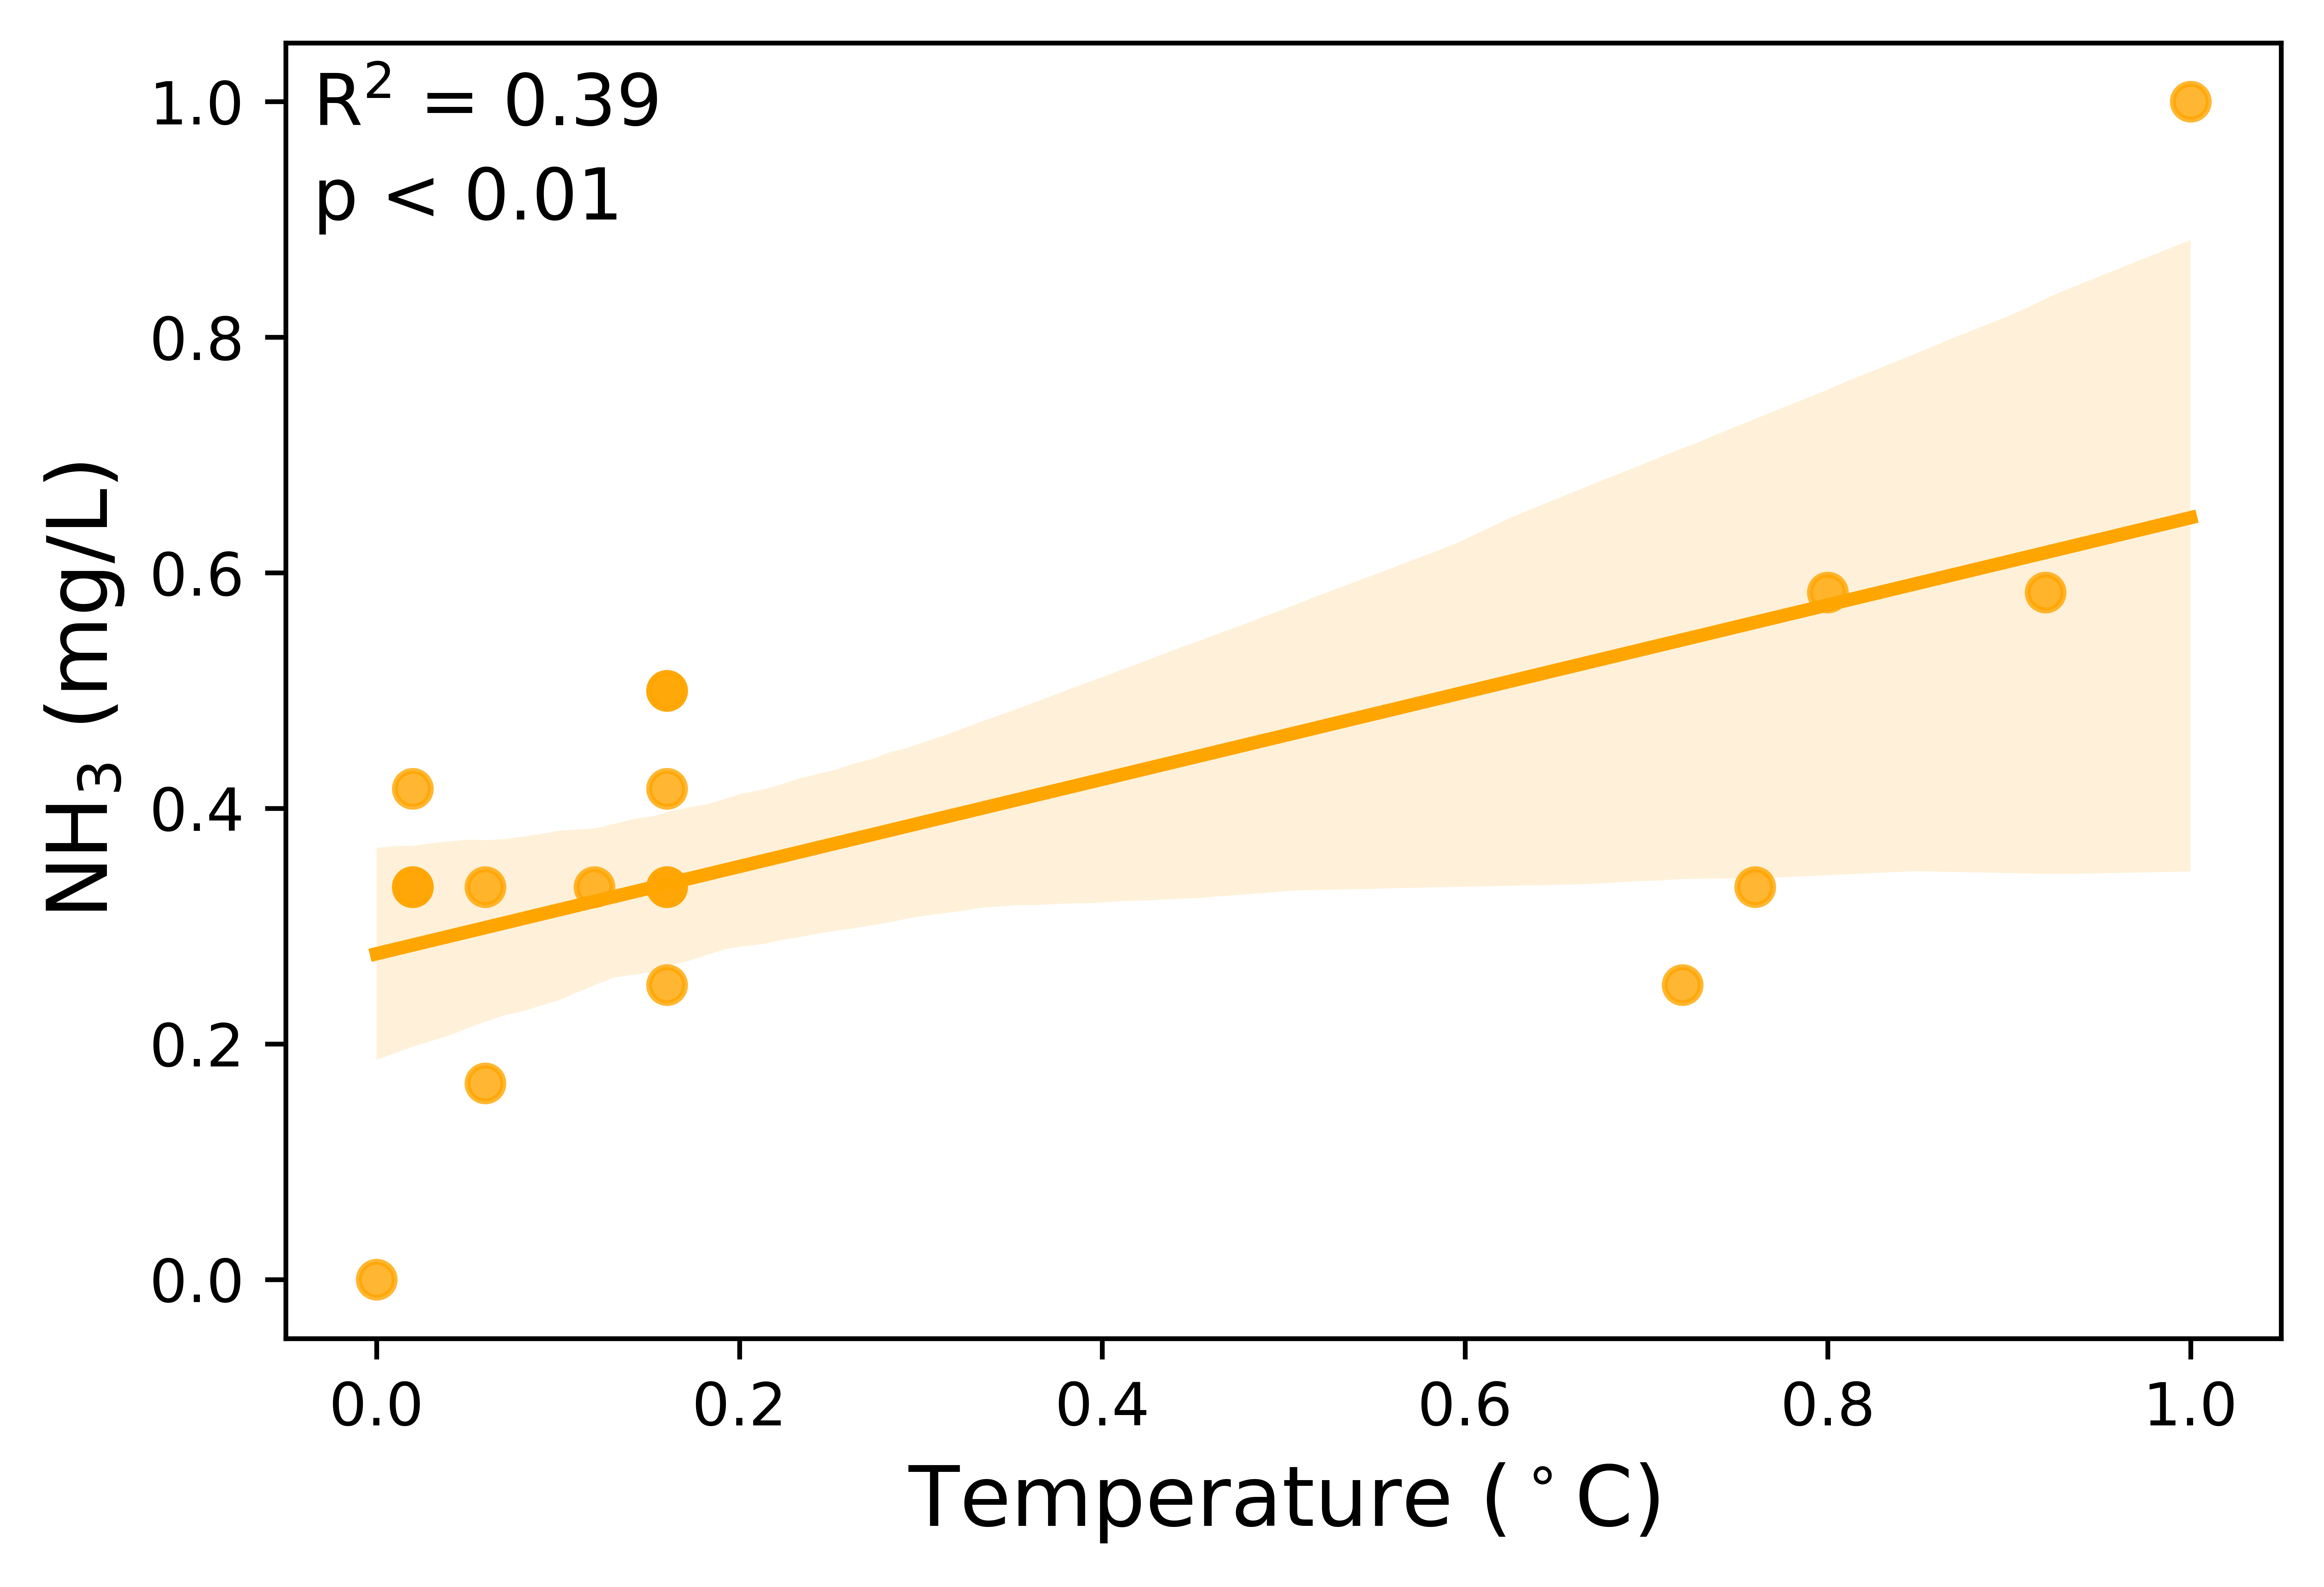

In [71]:
sns.regplot(data=WQ_df_upper, x="Temp_C", y= 'NH4', color = 'orange')

plt.ylabel("NH${}_3$ (mg/L)", fontsize = 14)
plt.xlabel("Temperature ($^\circ$C)", fontsize = 14)
plt.text(-0.035, 0.98, 'R${}^2$ = 0.39', fontsize = 12)
plt.text(-0.035, 0.9, 'p < 0.01', fontsize = 12)

(-0.7, 1.2)

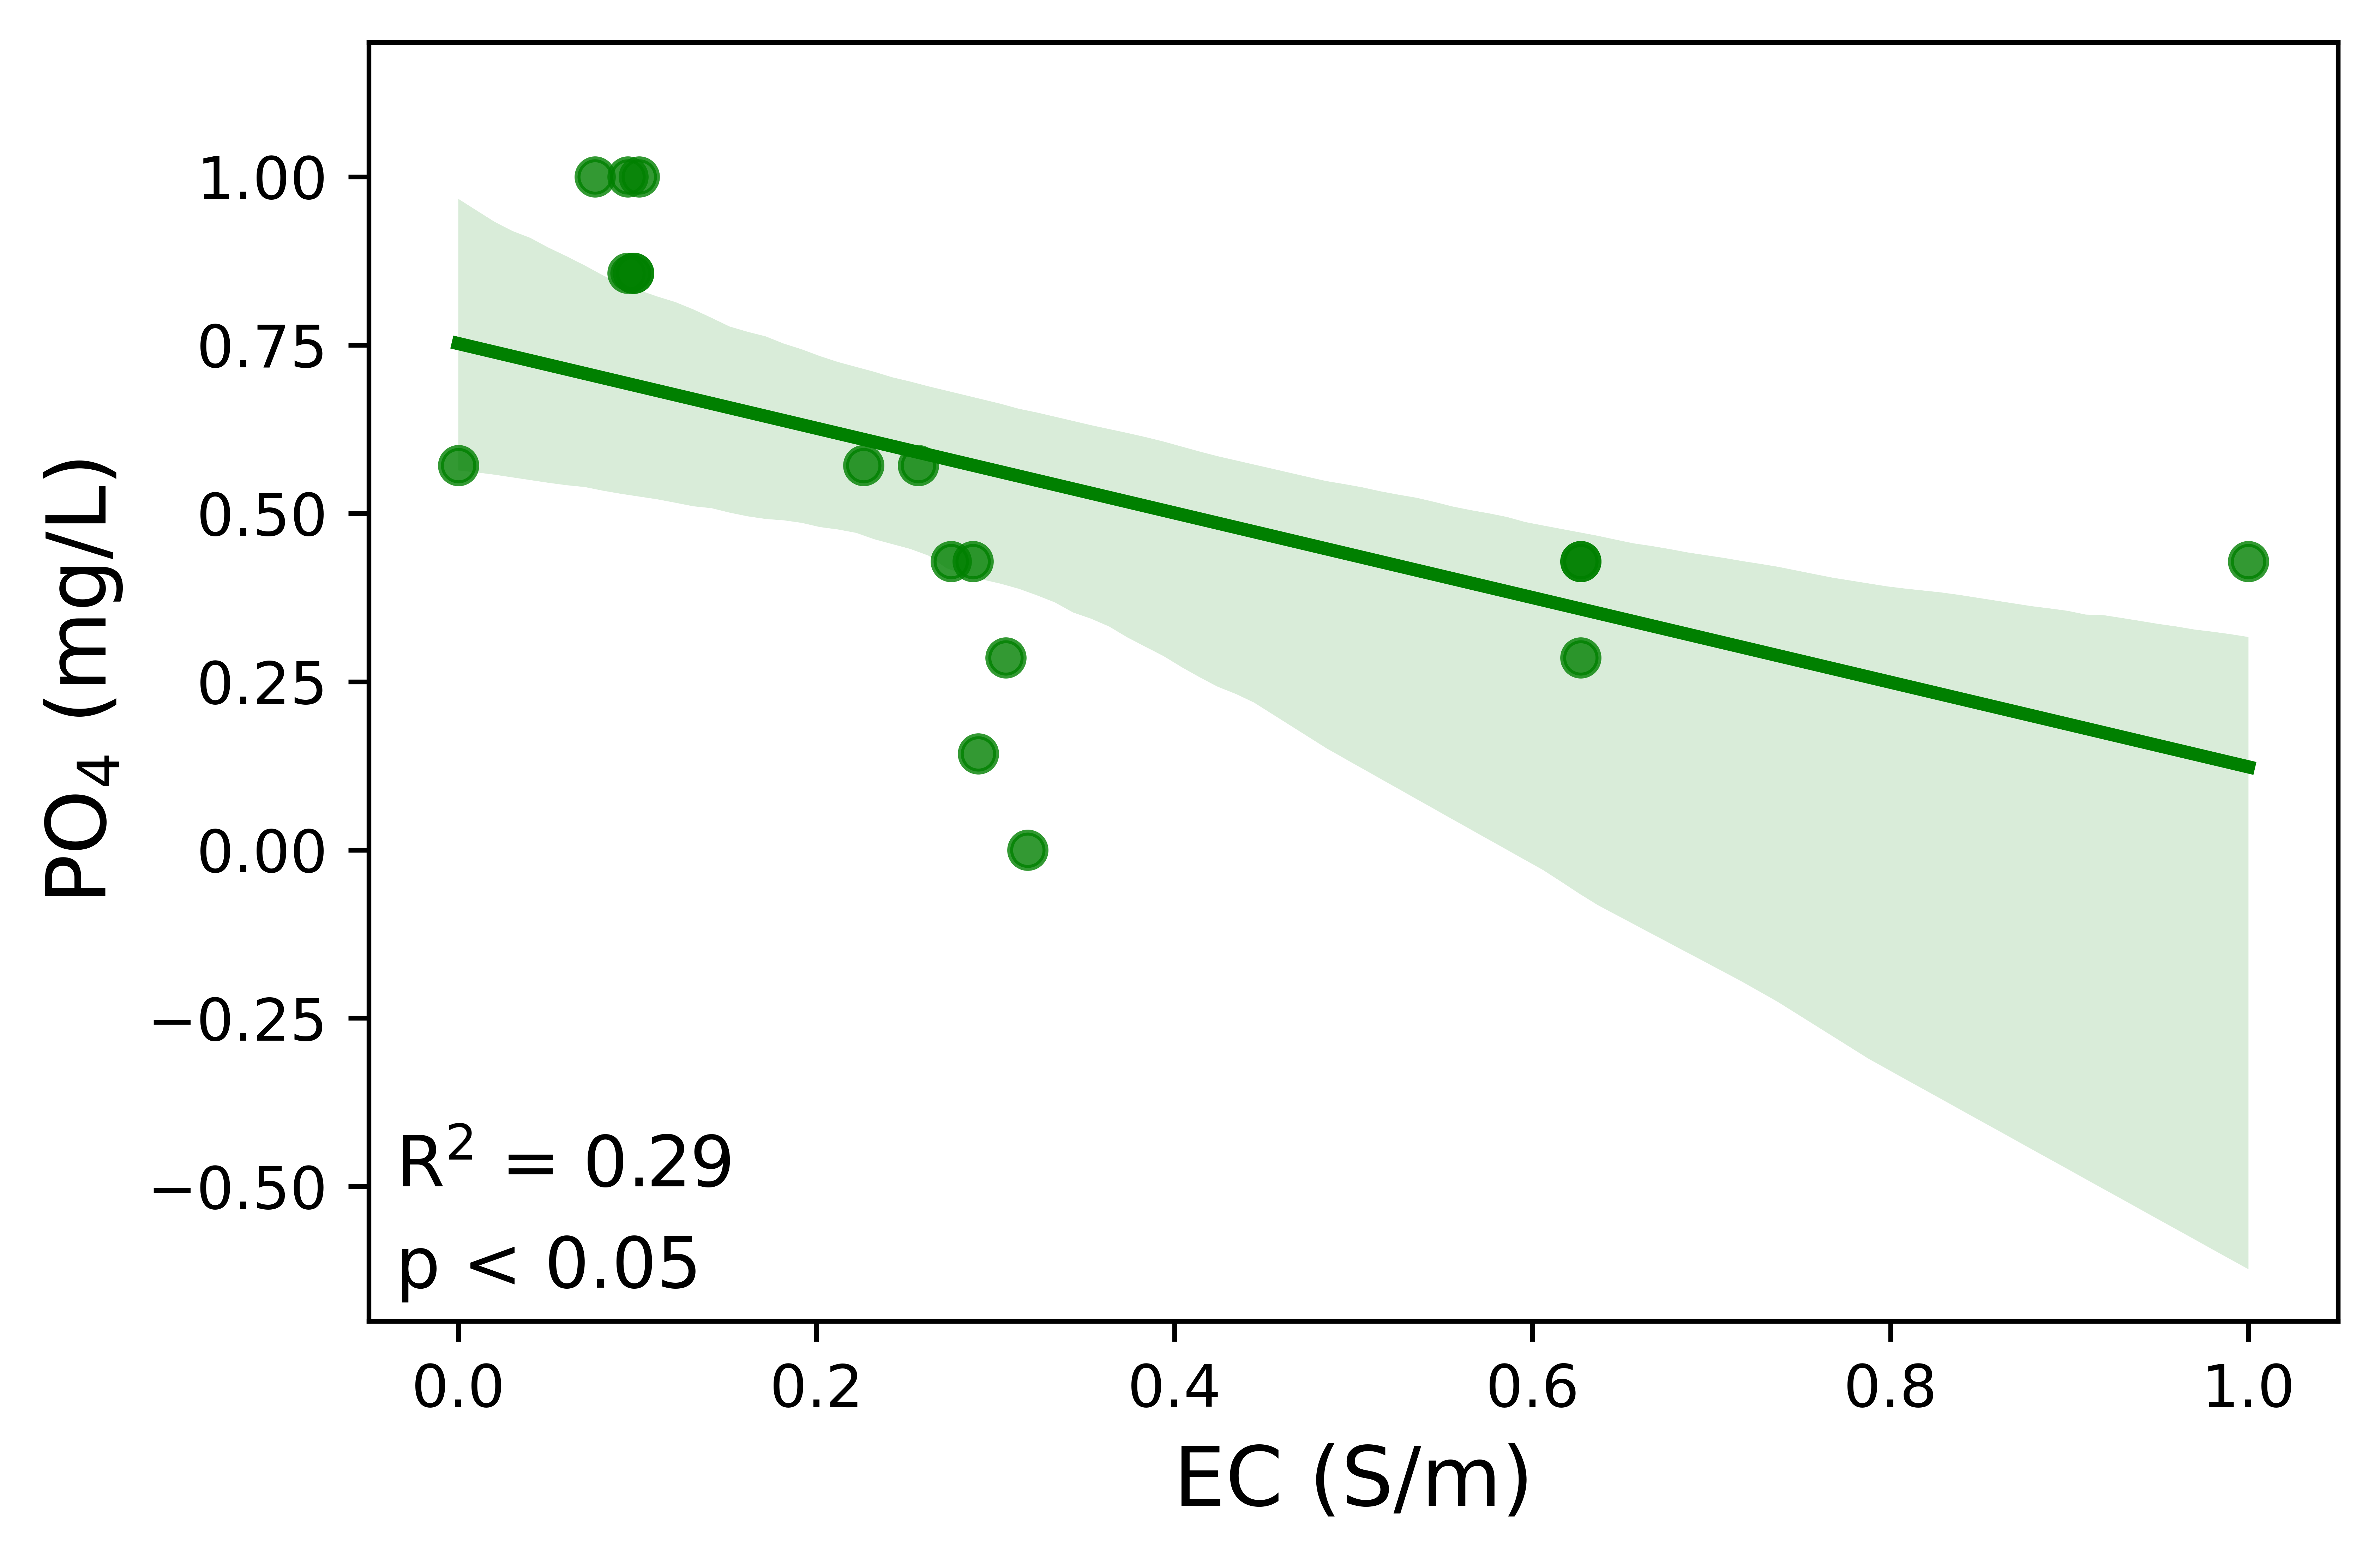

In [88]:
plot1 = sns.regplot(data=WQ_df_upper, x="EC", y= 'PO4_mgL', color = 'green')

plt.ylabel("PO${}_4$ (mg/L)", fontsize = 14)
plt.xlabel("EC (S/m)", fontsize = 14)
plt.text(-0.035, -0.5, 'R${}^2$ = 0.29', fontsize = 12)
plt.text(-0.035, -0.65, 'p < 0.05', fontsize = 12)

plot1.set_ylim(-0.7,1.2)

<AxesSubplot:xlabel='EC', ylabel='PO4_mgL'>

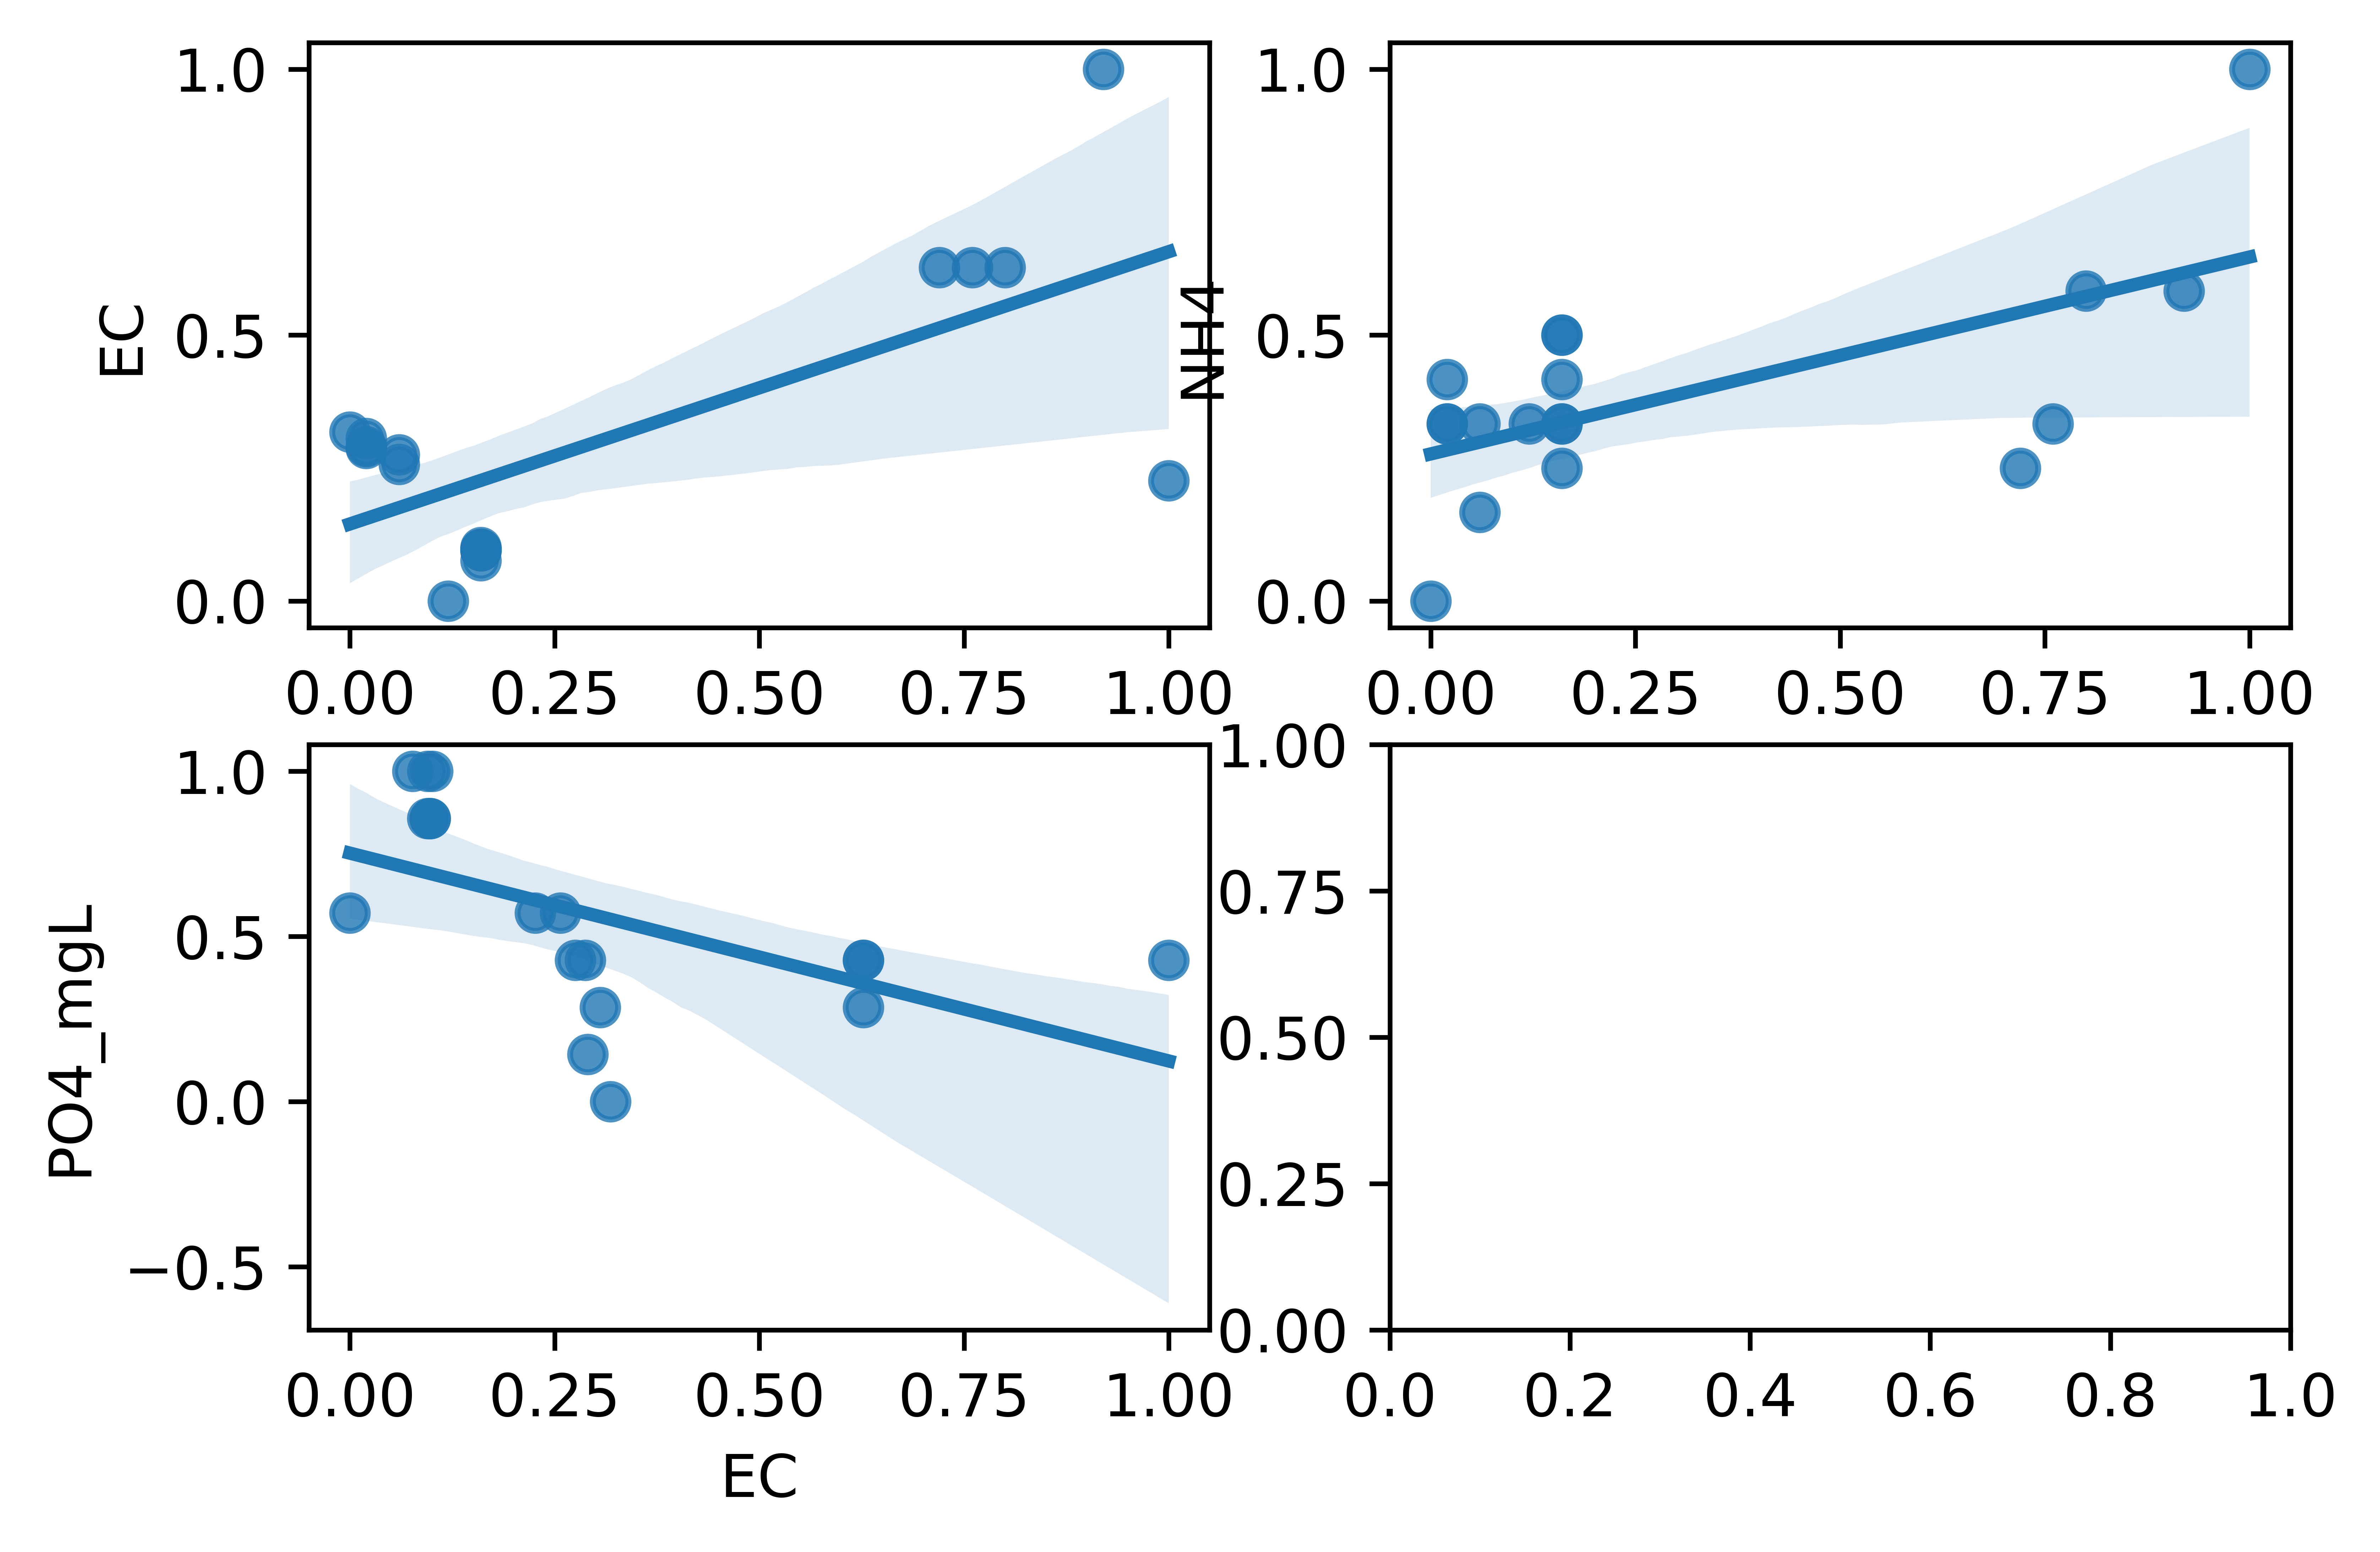

In [62]:
fig, axes = plt.subplots(2, 2)
sns.regplot(data=WQ_df_upper, x='Temp_C', y='EC', ax=axes[0,0])
sns.regplot(data=WQ_df_upper, x='Temp_C', y='NH4', ax=axes[0,1])
sns.regplot(data=WQ_df_upper, x='EC', y='PO4_mgL', ax=axes[1,0])